<b>In this practical exam you are required to do the following:</b><b>
1. Implement the Adam (Batch Version) algorithm to train a multivariable linear regression model.
2. Update your implementation to work for mini-batch.
</b>

### Please fulfil the following requirements:
<br>
<b>
    
    1. Each implementation must be in a sepearate function. i.e. two separate functions.
    2. Check each function on the data in the attached file.
    3. You must obtain r2-score > 0.9 using each functiion.
    4. You must plot the following curves.
        - Loss vs. iterations.
        - Loss vs. each parameter (i.e. loss vs theta 0, loss vs. theta 1 .... etc.).
    5. Choose hyper parameters to obtain the required accuracy.
    6. The implementation must be vectoried and calculations must be performed as matrix vector multiplications.
    7. Apply the stop conditions (gradient < 0.001 and cost convergence check).                                            
</b>
    
<b><i>Note: You are allowed to use the code you developed during practical sessions. However, it should be your own code.</i></b>

## Best of Luck...

# Adam with Batch implementation


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read Data
dfb=pd.read_csv('MultipleLR.csv',names=['x1','x2','x3','y'])


# Add part of theta 0 (OR) bias
dfb.insert(0,'x0',1)

# In Mini-Batch and Stocastic we prefer shuffle data 
# shuffle DataFrame
# dfb = dfb.sample(frac=1)

# slice dataFrame to features and labels
col = dfb.shape[1]
xb=np.matrix(dfb.iloc[:, 0:col-1])   # Features
yb=np.matrix(dfb.iloc[:,col-1:col])  # Labels


In [3]:
#Initialize thetas
# thetab=np.matrix(np.zeros(4))     # 4 is no.of Features
# thetab

In [4]:
#Initialize thetas

thetab=np.matrix([0.9,0.9,0.9,0.9])     # 4 is no.of Features
thetab.shape

(1, 4)

In [5]:
def CostFunction_Batch(X,Y,Theta):              # 1/2m * (summation(h(xi) - y )^2 )
    
    H_theta=X @ Theta.T                   # h(xi) OR y_predict
    
    error=  np.linalg.norm(H_theta - Y,ord=2)   #  norm( y_predict - y_target)
    
    error_square = error ** 2        
    
    MSE=(error_square/(2*len(Y)))
    
    return MSE 

In [6]:
def Gradient_Batch(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(Theta.shape[1]))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(X) * np.sum(t)
    grad=temp
    return grad

In [7]:
def Adam_Batch (X,Y,Theta,V,M,beta_1,beta_2):
    if len(V)==0 & len(M)==0:
        M.append(np.matrix(np.zeros(Theta.shape[1])))
        V.append(np.matrix(np.zeros(Theta.shape[1])))
        return V,M
    
    
    mt=(beta_1 * V[-1]) + ((1-beta_1) * Gradient_Batch(X,Y,Theta))
    M.append(mt)
    vt=(beta_2 * V[-1]) + ((1-beta_2) * (np.power(Gradient_Batch(X,Y,Theta),2)))
    V.append(vt)
    return V,M

In [8]:
def Batch(X,Y,Theta,lr,iteration,beta_1,beta_2):  
    temp=np.matrix(np.zeros(Theta.shape[1]))
    vb=[]
    mb=[]
    thetas_per_Epoch_Batch=[]
    cost_per_epoch_Batch=[]
    theta_parameters=int(Theta.ravel().shape[1])
    eps=0.00000000001
    for i in range(iteration):
     

        vt,mt = Adam_Batch(X , Y ,Theta, vb , mb , beta_1 , beta_2)
        
        
        # Bias correction
        m_hat =(  mb[-1]   *  (1 / (1- (beta_1 ** (i+1) ) )  ) )
        v_hat =(  vb[-1]   *  (1 /( 1- (beta_2 ** (i+1) ) ) )  )
        
        
        cost_per_epoch_Batch.append( CostFunction_Batch(X,Y,Theta) )
        thetas_per_Epoch_Batch.append(Theta)
        
        
        if i > 1:
            if np.abs(cost_per_epoch_Batch[-1] - cost_per_epoch_Batch[-2]) < 0.001:
                break
            if np.linalg.norm(Gradient_Batch(X,Y,Theta)) < 0.001:
                break;
        #update theta after one Batch
        temp = Theta - (lr * m_hat)/(np.sqrt(v_hat)+eps)
        Theta=temp
        

        


        
    return Theta, cost_per_epoch_Batch ,thetas_per_Epoch_Batch

## Hyper parameters

In [9]:
lrb=0.000001
epochb=1000
beta1b=0.9
beta2b=0.0005

In [10]:
th_op_Batch , cost_Batch , th_all_Batch = Batch(xb,yb,thetab,lrb,epochb,beta1b,beta2b)

In [11]:
th_op_Batch

matrix([[0.89717418, 0.6739616 , 0.67255975, 0.67089666]])

In [12]:
 cost_Batch[-1]

6.094750029338013

Text(0, 0.5, 'Cost Value')

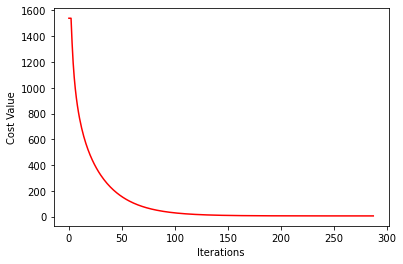

In [13]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost_Batch)), cost_Batch ,'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

In [14]:
th_batch=np.array(th_all_Batch)


Text(0, 0.5, 'Cost Value')

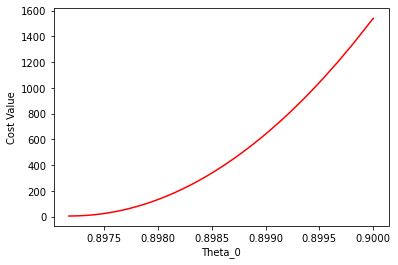

In [15]:
fig,ax = plt.subplots()
ax.plot(th_batch[:,:,0], cost_Batch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

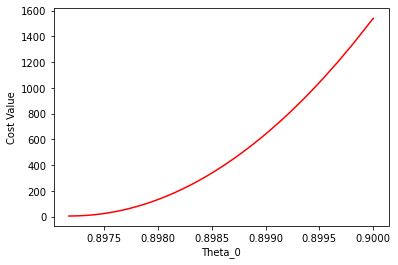

In [16]:
fig,ax = plt.subplots()
ax.plot(th_batch[:,:,0], cost_Batch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

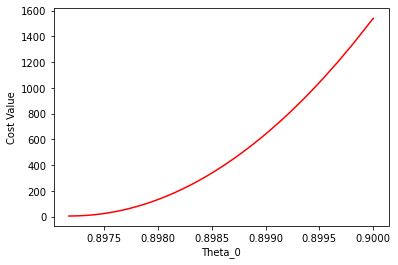

In [17]:
fig,ax = plt.subplots()
ax.plot(th_batch[:,:,0], cost_Batch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

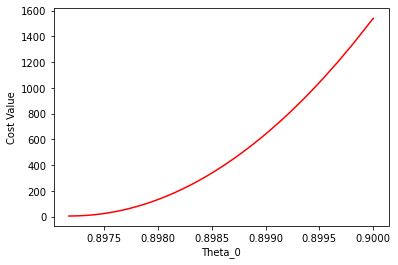

In [18]:
fig,ax = plt.subplots()
ax.plot(th_batch[:,:,0], cost_Batch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

In [19]:
y_hat_batch = xb @ th_op_Batch.T

In [20]:
from sklearn.metrics import r2_score
r2_score(dfb.y , y_hat_batch)

C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.978036873514093

# Adam with mini-Batch implementation


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Read Data and preprocessing

In [22]:
# Read Data
dfm=pd.read_csv('MultipleLR.csv',names=['x1','x2','x3','y'])


# Add part of theta 0 (OR) bias
dfm.insert(0,'x0',1)

# In Mini-Batch and Stocastic we prefer shuffle data 
# shuffle DataFrame
dfm = dfm.sample(frac=1)

# slice dataFrame to features and labels
col = dfm.shape[1]
xm=np.matrix(dfm.iloc[:, 0:col-1])   # Features
ym=np.matrix(dfm.iloc[:,col-1:col])  # Labels


In [23]:
# Initialize thetas
# theta=np.matrix(np.zeros(4))     # 4 is no.of Features
# theta

In [24]:
thetam=np.matrix([0.9,0.9,0.9,0.9])     # 4 is no.of Features
thetam.shape

(1, 4)

## Cost Function

In [25]:
def CostFunction(X,Y,Theta):              # 1/2m * (summation(h(xi) - y )^2 )
    
    H_theta=X @ Theta.T                   # h(xi) OR y_predict
    
    error=  np.linalg.norm(H_theta - Y,ord=2)   #  norm( y_predict - y_target)
    
    error_square = error ** 2        
    
    MSE=(error_square/(2*len(Y)))
    
    return MSE 

## Gradient Function

In [26]:
def Gradient(X,Y,Theta):
    theta_parameters=int(Theta.ravel().shape[1]) 
    temp = np.matrix(np.zeros(Theta.shape[1]))
    for j in range(theta_parameters):
        error = (X*Theta.T) - Y              # (summation(h(xi) - y ) 
        t= np.multiply(error,X[:,j])         # (summation(h(xi) - y ) *xi
        temp[:,j] = 1/len(X) * np.sum(t)
    grad=temp
    return grad

# Adam Function  (mt & vt)

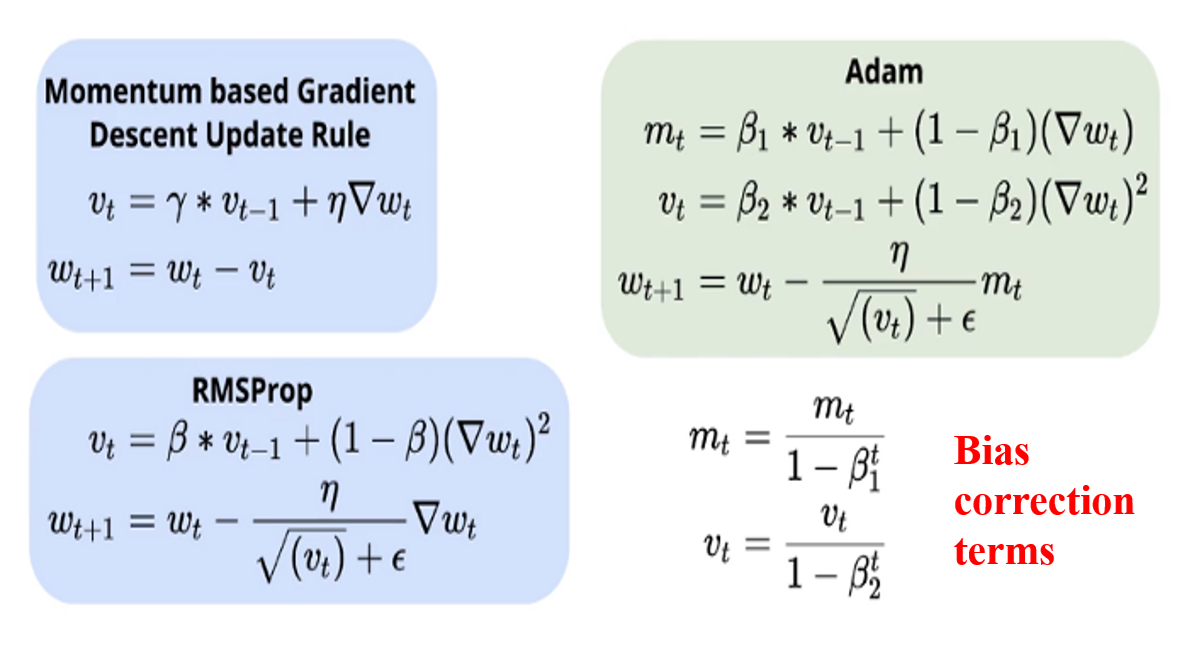

In [27]:
def Adam_Mini (X,Y,Theta,V,M,beta_1,beta_2):
    if len(V)==0 & len(M)==0:
        M.append(np.matrix(np.zeros(Theta.shape[1])))
        V.append(np.matrix(np.zeros(Theta.shape[1])))
        return V,M
    
    
    mt=(beta_1 * V[-1]) + ((1-beta_1) * Gradient(X,Y,Theta))
    M.append(mt)
    vt=(beta_2 * V[-1]) + ((1-beta_2) * (np.power(Gradient(X,Y,Theta),2)))
    V.append(vt)
    return V,M

# Mini-Batch Function

In [28]:
def MiniBatch(X,Y,Theta,lr,Epoch,NoBatch,beta_1,beta_2):
    temp=np.matrix(np.zeros(Theta.shape[1]))
    v=[]
    m=[]
    thetas_per_Epoch=[]
    cost_per_epoch=[]
    theta_parameters=int(Theta.ravel().shape[1])
    batch_size= int( len(Y)/ NoBatch)
    cost=0
    eps=0.00000000001

    for i in range (Epoch):
        
     
        for z in range(0,len(X),batch_size):
            
            # Slice Data depend on Batch size & no.of Batches
            x_new=X[z:z+batch_size]
            y_new=Y[z:z+batch_size]
            
            # call adam function to return vt and mt
            vt,mt = Adam_Mini(x_new , y_new ,Theta, v , m , beta_1 , beta_2)
            
            # Bias correction
            m_hat =(  mt[-1]   *  (1 / (1- (beta_1 ** (i+1) ) )  ) )
            v_hat =(  vt[-1]   *  (1 /( 1- (beta_2 ** (i+1) ) ) )  )
            
            #update theta after one Batch
            temp = Theta - (lr * m_hat)/(np.sqrt(v_hat)+eps)

            Theta=temp
            
        
        # append summution of costs after each epoch
        cost_per_epoch.append(CostFunction(X,Y,Theta))
        
        # append thetas after each epoch
        thetas_per_Epoch.append(Theta)
        
        #stop condition
        if i > 1:
            if np.abs(cost_per_epoch[-1] - cost_per_epoch[-2]) < 0.001:
                break
            if np.linalg.norm(Gradient(X,Y,Theta)) < 0.001:
                break;
    return Theta , thetas_per_Epoch, cost_per_epoch

### function parameters

In [29]:
lr=0.0000001
epoch=1000
no_batch=5
beta1=0.9
beta2=0.0005

## Call Mini-Batch with Adam

In [30]:
th_op  , th_per_epoch , cost_per_epoch=MiniBatch(xm,ym,thetam,lr,epoch,no_batch,beta1,beta2)

In [31]:
th_op

matrix([[0.89727766, 0.67414038, 0.6709301 , 0.67007627]])

In [32]:
cost_per_epoch[-1]

6.072196541794045

## Graph (Cost/Batch  & iterations)

Text(0, 0.5, 'Cost Value')

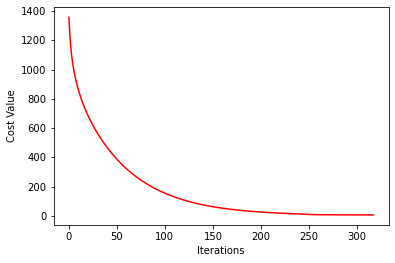

In [33]:
fig,ax = plt.subplots()
ax.plot(np.arange(len(cost_per_epoch)), cost_per_epoch ,'r')

ax.set_xlabel('Iterations')
ax.set_ylabel('Cost Value')

## Graph (Cost/epoch)

In [34]:
th_epoch=np.array(th_per_epoch)


Text(0, 0.5, 'Cost Value')

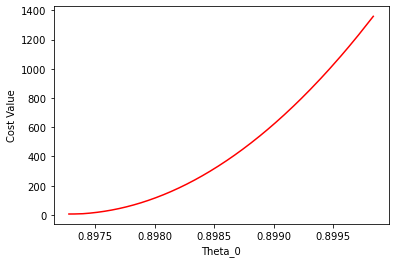

In [35]:
fig,ax = plt.subplots()
ax.plot(th_epoch[:,:,0], cost_per_epoch ,'r')

ax.set_xlabel('Theta_0')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

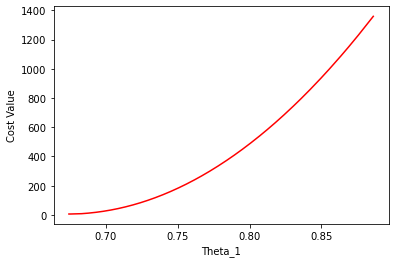

In [36]:
fig,ax = plt.subplots()
ax.plot(th_epoch[:,:,1], cost_per_epoch ,'r')

ax.set_xlabel('Theta_1')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

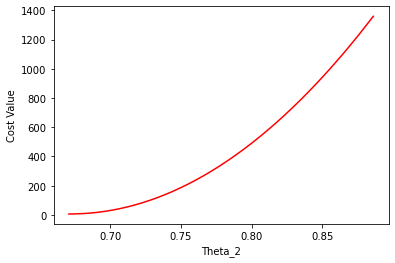

In [37]:
fig,ax = plt.subplots()
ax.plot(th_epoch[:,:,2], cost_per_epoch ,'r')

ax.set_xlabel('Theta_2')
ax.set_ylabel('Cost Value')

Text(0, 0.5, 'Cost Value')

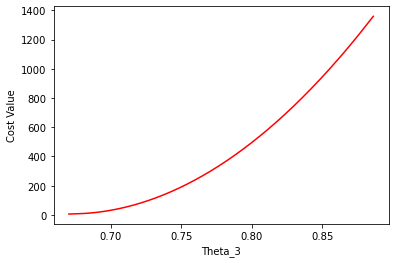

In [38]:
fig,ax = plt.subplots()
ax.plot(th_epoch[:,:,3], cost_per_epoch ,'r')

ax.set_xlabel('Theta_3')
ax.set_ylabel('Cost Value')

In [39]:
y_hat=xm @th_op.T

In [40]:
from sklearn.metrics import r2_score


In [41]:
r2_score(dfm.y , y_hat)

C:\Users\ahmad\anaconda3\lib\site-packages\sklearn\utils\validation.py:585: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


0.9781181475773838